In [1]:
import numpy as np
import pandas as pd
import pickle
import xgboost
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, wilcoxon

In [2]:
def test_diff_cross(df, row='multi-atlas'):
    tmp= pd.DataFrame(index=df.columns, columns=df.columns)
    for i in df.columns:
        for j in df.columns:
            tmp.loc[i,j]= ttest_rel(np.abs(df.loc[row, i]), np.abs(df.loc[row, j]))[1]
    return tmp

def test_diff_cross_wilcoxon(df, row='multi-atlas'):
    tmp= pd.DataFrame(index=df.columns, columns=df.columns)
    for i in df.columns:
        for j in df.columns:
            try:
                tmp.loc[i,j]= wilcoxon(np.abs(df.loc[row, i]), np.abs(df.loc[row, j]), alternative='less')[1]
            except:
                print('wilcoxon error')
                tmp.loc[i,j]= np.nan
    return tmp

def test_diff(df, col='multi-atlas'):
    tmp= pd.DataFrame(index=df.index, columns=df.columns)
    for i in df.index:
        for j in df.columns:
            tmp.loc[i,j]= ttest_rel(np.abs(df.loc[i, j]), np.abs(df.loc[col, j]))[1]
    tmp= tmp.drop(col, axis='rows')
    return tmp

def test_diff_wilcoxon(df, col='multi-atlas'):
    tmp= pd.DataFrame(index=df.index, columns=df.columns)
    for i in df.index:
        for j in df.columns:
            try:
                tmp.loc[i,j]= wilcoxon(np.abs(df.loc[col, j]), np.abs(df.loc[i, j]), alternative='less')[1]
            except:
                print('wilcoxon error')
                tmp.loc[i,j]= np.nan
    tmp= tmp.drop(col, axis='rows')
    return tmp

def test_compare(df0, df1):
    tmp= pd.DataFrame(index=df0.index, columns=df0.columns)
    for i in df0.index:
        for j in df0.columns:
            tmp.loc[i,j]= ttest_rel(np.abs(df0.loc[i, j]), np.abs(df1.loc[i, j]))[1]
    return tmp

def test_compare_wilcoxon(df0, df1):
    tmp= pd.DataFrame(index=df0.index, columns=df0.columns)
    for i in df0.index:
        for j in df0.columns:
            tmp.loc[i,j]= wilcoxon(np.abs(df0.loc[i, j]), np.abs(df1.loc[i, j]), alternative='less')[1]
    return tmp

In [3]:
data_fs= pickle.load(open('results.pickle', 'rb'))
data_no_fs= pickle.load(open('results_no_fs.pickle', 'rb'))

In [4]:
mld_fs= data_fs[data_fs['dataset'] == 'mld']
hinds_fs= data_fs[data_fs['dataset'] == 'hinds']

mld_no_fs= data_no_fs[data_no_fs['dataset'] == 'mld']
hinds_no_fs= data_no_fs[data_no_fs['dataset'] == 'hinds']

In [5]:
mld_fs.columns

Index(['model_selection_score', 'features', 'parameters', 'model', 'r2_1',
       'rmse_1', 'y_test_1', 'y_pred_1', 'y_indices_1', 'r2_per_fold_1',
       'rmse_per_fold_1', 'r2_std_1', 'rmse_std_1', 'dataset', 'type'],
      dtype='object')

In [6]:
mld_no_fs.columns

Index(['model_selection_score', 'features', 'parameters', 'model', 'r2_1',
       'rmse_1', 'y_test_1', 'y_pred_1', 'y_indices_1', 'r2_per_fold_1',
       'rmse_per_fold_1', 'r2_std_1', 'rmse_std_1', 'dataset', 'type'],
      dtype='object')

In [7]:
a= mld_fs[mld_fs['type'] == 'all']
b= a[a['model'] == 'LassoRegression_Objective']
y_test, y_pred= b.iloc[0][['y_test_1', 'y_pred_1']]

print(np.mean(y_test))
print(np.sqrt(np.mean((y_test - y_pred)**2)))
print(b['features'].iloc[0])

143.16470588235293
6.556116878368265
['mean-203a-mld.nii-0.500000', 'skew-203a-mld.nii-0.500000', 'kurt-203a-mld.nii-0.500000', 'hist-0-203a-mld.nii-0.500000', 'hist-8-203a-mld.nii-0.500000', 'sum-203k-mld.nii-0.500000', 'kurt-203k-mld.nii-0.500000', 'hist-1-203k-mld.nii-0.500000', 'hist-2-203k-mld.nii-0.500000', 'hist-12-204f-mld.nii-0.500000', 'hist-16-204f-mld.nii-0.500000', 'hist-1-206k-mld.nii-0.500000', 'hist-2-206k-mld.nii-0.500000', 'hist-12-206k-mld.nii-0.500000', 'hist-16-206k-mld.nii-0.500000', 'hist-19-206k-mld.nii-0.500000', 'hist-15-208f-mld.nii-0.500000', 'num-0.500000-mean_mask', 'hist-0-0.500000-mean_mask', 'hist-19-0.500000-mean_mask']


In [8]:
b['features'].iloc[0]

['mean-203a-mld.nii-0.500000',
 'skew-203a-mld.nii-0.500000',
 'kurt-203a-mld.nii-0.500000',
 'hist-0-203a-mld.nii-0.500000',
 'hist-8-203a-mld.nii-0.500000',
 'sum-203k-mld.nii-0.500000',
 'kurt-203k-mld.nii-0.500000',
 'hist-1-203k-mld.nii-0.500000',
 'hist-2-203k-mld.nii-0.500000',
 'hist-12-204f-mld.nii-0.500000',
 'hist-16-204f-mld.nii-0.500000',
 'hist-1-206k-mld.nii-0.500000',
 'hist-2-206k-mld.nii-0.500000',
 'hist-12-206k-mld.nii-0.500000',
 'hist-16-206k-mld.nii-0.500000',
 'hist-19-206k-mld.nii-0.500000',
 'hist-15-208f-mld.nii-0.500000',
 'num-0.500000-mean_mask',
 'hist-0-0.500000-mean_mask',
 'hist-19-0.500000-mean_mask']

In [9]:
rename_dict_regr= {'KNNR_Objective': 'kNN', 'LinearRegression_Objective': 'linear', 'PLSRegression_Objective': 'PLS', 'RidgeRegression_Objective': 'ridge', 'LassoRegression_Objective': 'lasso'}
rename_dict_type= {'203a': 'atlas 1', '203k': 'atlas 2', '204f': 'atlas 3', '206k': 'atlas 4', '208f': 'atlas 5', 'all': 'multi-atlas', 'mean_mask': 'mean'}
row_order= ['atlas 1', 'atlas 2', 'atlas 3', 'atlas 4', 'atlas 5', 'mean', 'multi-atlas']
col_order= ['linear', 'PLS', 'lasso', 'ridge', 'kNN']

mld_fs_results= mld_fs.pivot(index='type', columns='model', values='r2_1')
mld_fs_results= mld_fs_results.rename(rename_dict_regr, axis='columns')
mld_fs_results= mld_fs_results.rename(rename_dict_type)
mld_fs_results= mld_fs_results.apply(lambda x: np.round(x, 4))
mld_fs_results= mld_fs_results.loc[row_order, col_order]

mld_fs_results_std= mld_fs.pivot(index='type', columns='model', values='r2_std_1')
mld_fs_results_std= mld_fs_results_std.rename(rename_dict_regr, axis='columns')
mld_fs_results_std= mld_fs_results_std.rename(rename_dict_type)
mld_fs_results_std= mld_fs_results_std.apply(lambda x: np.round(x, 4))
mld_fs_results_std= mld_fs_results_std.loc[row_order, col_order]

mld_fs_results_perc= (mld_fs_results_std/mld_fs_results*100).apply(lambda x: np.round(np.abs(x), 1))

mld_no_fs_results= mld_no_fs.pivot(index='type', columns='model', values='r2_1')
mld_no_fs_results= mld_no_fs_results.rename(rename_dict_regr, axis='columns')
mld_no_fs_results= mld_no_fs_results.rename(rename_dict_type)
mld_no_fs_results= mld_no_fs_results.apply(lambda x: np.round(x, 4))
mld_no_fs_results= mld_no_fs_results.loc[row_order, col_order]

mld_no_fs_results_std= mld_no_fs.pivot(index='type', columns='model', values='r2_std_1')
mld_no_fs_results_std= mld_no_fs_results_std.rename(rename_dict_regr, axis='columns')
mld_no_fs_results_std= mld_no_fs_results_std.rename(rename_dict_type)
mld_no_fs_results_std= mld_no_fs_results_std.apply(lambda x: np.round(x, 4))
mld_no_fs_results_std= mld_no_fs_results_std.loc[row_order, col_order]

mld_no_fs_results_perc= (mld_no_fs_results_std/mld_no_fs_results*100).apply(lambda x: np.round(np.abs(x), 1))

mld_all= pd.concat([mld_fs_results.astype(str) + '\pm' + mld_fs_results_std.astype(str), mld_no_fs_results.astype(str) + '\pm' + mld_no_fs_results_std.astype(str)], axis='columns')
columns= pd.MultiIndex.from_product([['feature selection', 'no feature selection'], col_order])
mld_all.columns= columns

print(mld_all.to_latex().replace('\\textbackslash pm', '$\pm$'))

\begin{tabular}{lllllllllll}
\toprule
{} & \multicolumn{5}{l}{feature selection} & \multicolumn{5}{l}{no feature selection} \\
{} &            linear &              PLS &            lasso &            ridge &              kNN &               linear &              PLS &            lasso &            ridge &              kNN \\
type        &                   &                  &                  &                  &                  &                      &                  &                  &                  &                  \\
\midrule
atlas 1     &   0.7786$\pm$0.1265 &  0.7775$\pm$0.1296 &   0.7785$\pm$0.126 &   0.7786$\pm$0.126 &   0.733$\pm$0.1178 &      0.7425$\pm$0.1383 &   0.7559$\pm$0.143 &  0.7655$\pm$0.1325 &  0.7591$\pm$0.1359 &  0.5881$\pm$0.1351 \\
atlas 2     &    0.7728$\pm$0.136 &   0.7728$\pm$0.136 &  0.7706$\pm$0.1358 &  0.7716$\pm$0.1375 &   0.708$\pm$0.1467 &      0.7304$\pm$0.1617 &  0.7532$\pm$0.1504 &  0.7553$\pm$0.1434 &  0.7547$\pm$0.1427 &    0.5419$\pm$0

In [10]:
print(mld_all[['feature selection']].to_latex().replace('\\textbackslash pm', ' $\pm$ '))
print(mld_all[['no feature selection']].to_latex().replace('\\textbackslash pm', ' $\pm$ '))

\begin{tabular}{llllll}
\toprule
{} & \multicolumn{5}{l}{feature selection} \\
{} &            linear &              PLS &            lasso &            ridge &              kNN \\
type        &                   &                  &                  &                  &                  \\
\midrule
atlas 1     &   0.7786 $\pm$ 0.1265 &  0.7775 $\pm$ 0.1296 &   0.7785 $\pm$ 0.126 &   0.7786 $\pm$ 0.126 &   0.733 $\pm$ 0.1178 \\
atlas 2     &    0.7728 $\pm$ 0.136 &   0.7728 $\pm$ 0.136 &  0.7706 $\pm$ 0.1358 &  0.7716 $\pm$ 0.1375 &   0.708 $\pm$ 0.1467 \\
atlas 3     &   0.7529 $\pm$ 0.1452 &  0.7454 $\pm$ 0.1541 &  0.7528 $\pm$ 0.1451 &  0.7541 $\pm$ 0.1443 &  0.6974 $\pm$ 0.1279 \\
atlas 4     &   0.7459 $\pm$ 0.1505 &  0.7456 $\pm$ 0.1459 &  0.7445 $\pm$ 0.1466 &  0.7469 $\pm$ 0.1437 &  0.6553 $\pm$ 0.1352 \\
atlas 5     &   0.7455 $\pm$ 0.1655 &   0.7577 $\pm$ 0.162 &  0.7477 $\pm$ 0.1621 &  0.7448 $\pm$ 0.1652 &  0.6937 $\pm$ 0.1314 \\
mean        &   0.7797 $\pm$ 0.1373 &  0.778

In [11]:
a= mld_fs[mld_fs['type'] == 'all']
b= a[a['model'] == 'LassoRegression_Objective']
y_test= b['y_test_1']
y_pred= b['y_pred_1']

In [12]:
import matplotlib.pyplot as plt

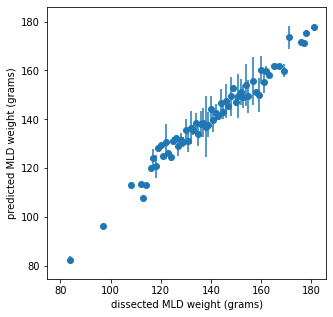

In [13]:
fig= plt.figure(figsize=(5, 5))
ax= fig.add_subplot(111)
tmp= pd.DataFrame({'y_test': np.hstack(y_test), 'y_pred': np.hstack(y_pred)}).groupby('y_test').agg({'y_pred': ['mean', 'std']})['y_pred'].reset_index(drop=False)

ax.scatter(tmp['y_test'], tmp['mean'])
ax.errorbar(tmp['y_test'], tmp['mean'], yerr=tmp['std'], ls='none')
ax.set_xlabel('dissected MLD weight (grams)')
ax.set_ylabel('predicted MLD weight (grams)')
ax.set_xlim(np.min([np.min(y_pred), np.min(y_test)])-5, np.max([np.max(y_pred), np.max(y_test)])+5)
ax.set_ylim(np.min([np.min(y_pred), np.min(y_test)])-5, np.max([np.max(y_pred), np.max(y_test)])+5)
fig.savefig('mld_plot.pdf')

In [14]:
tmp

,y_test,mean,std
0,84.0,82.315173,1.581195
1,97.0,96.296959,0.466765
2,108.0,113.229384,1.151120
3,112.0,113.475242,0.922435
4,113.0,107.880652,0.818717
...,...,...,...
56,171.0,173.670545,4.728546
57,176.0,171.688378,1.292255
58,177.0,171.057700,1.089984
59,178.0,175.537988,1.092432


In [15]:
mld_fs_results= mld_fs.pivot(index='type', columns='model', values='r2_1')

In [16]:
print(mld_fs[mld_fs['type'] == '203a'].iloc[2]['parameters'])
print(mld_fs[mld_fs['type'] == '203a'].iloc[3]['parameters'])

{'memory': None, 'steps': [('prep', StandardScaler()), ('model', Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso(alpha=0.05, random_state=5))]))], 'verbose': False, 'prep': StandardScaler(), 'model': Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso(alpha=0.05, random_state=5))]), 'prep__copy': True, 'prep__with_mean': True, 'prep__with_std': True, 'model__memory': None, 'model__steps': [('standardscaler', StandardScaler(with_mean=False)), ('lasso', Lasso(alpha=0.05, random_state=5))], 'model__verbose': False, 'model__standardscaler': StandardScaler(with_mean=False), 'model__lasso': Lasso(alpha=0.05, random_state=5), 'model__standardscaler__copy': True, 'model__standardscaler__with_mean': False, 'model__standardscaler__with_std': True, 'model__lasso__alpha': 0.05, 'model__lasso__copy_X': True, 'model__lasso__fit_intercept': True, 'model__lasso__max_iter': 1000, 'model__lasso__normali

In [17]:
mld_fs['diff']= (mld_fs['y_pred_1'] - mld_fs['y_test_1'])**2
mld_fs_test= mld_fs.pivot(index='type', columns='model', values='diff')
mld_fs_test= mld_fs_test.rename(rename_dict_regr, axis='columns')
mld_fs_test= mld_fs_test.rename(rename_dict_type)
mld_fs_test= mld_fs_test.loc[row_order, col_order]

mld_no_fs['diff']= (mld_no_fs['y_pred_1'] - mld_no_fs['y_test_1'])**2
mld_no_fs_test= mld_no_fs.pivot(index='type', columns='model', values='diff')
mld_no_fs_test= mld_no_fs_test.rename(rename_dict_regr, axis='columns')
mld_no_fs_test= mld_no_fs_test.rename(rename_dict_type)
mld_no_fs_test= mld_no_fs_test.loc[row_order, col_order]

C:\Users\gyuri\anaconda3\envs\rabbit\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gyuri\anaconda3\envs\rabbit\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
print(test_compare_wilcoxon(mld_fs_test, mld_no_fs_test).applymap(lambda x: '%.0e' % x).to_latex())

\begin{tabular}{llllll}
\toprule
model & linear &    PLS &  lasso &   ridge &     kNN \\
type        &        &        &        &         &         \\
\midrule
atlas 1     &  4e-12 &  3e-38 &  2e-12 &   7e-24 &   2e-72 \\
atlas 2     &  3e-23 &  6e-17 &  3e-29 &   1e-20 &   8e-71 \\
atlas 3     &  2e-11 &  1e-17 &  3e-12 &   4e-20 &   1e-91 \\
atlas 4     &  2e-09 &  1e-04 &  2e-05 &   1e-21 &   2e-62 \\
atlas 5     &  1e-27 &  1e-26 &  2e-10 &   4e-17 &  3e-122 \\
mean        &  5e-26 &  3e-28 &  2e-37 &   5e-37 &   3e-60 \\
multi-atlas &  0e+00 &  2e-39 &  6e-42 &  1e-122 &  1e-113 \\
\bottomrule
\end{tabular}



In [19]:
print(test_diff_wilcoxon(mld_fs_test).applymap(lambda x: '%.0e' % x).to_latex())

wilcoxon error
wilcoxon error
wilcoxon error
wilcoxon error
wilcoxon error
\begin{tabular}{llllll}
\toprule
model & linear &    PLS &  lasso &  ridge &    kNN \\
type    &        &        &        &        &        \\
\midrule
atlas 1 &  4e-36 &  2e-29 &  2e-30 &  3e-32 &  8e-02 \\
atlas 2 &  3e-16 &  2e-13 &  2e-21 &  2e-11 &  2e-08 \\
atlas 3 &  4e-41 &  3e-22 &  4e-48 &  1e-48 &  4e-14 \\
atlas 4 &  5e-66 &  1e-59 &  2e-63 &  1e-68 &  2e-49 \\
atlas 5 &  6e-29 &  3e-18 &  6e-35 &  3e-37 &  2e-17 \\
mean    &  4e-24 &  4e-11 &  3e-20 &  3e-20 &  2e-04 \\
\bottomrule
\end{tabular}



In [20]:
print(test_diff_cross_wilcoxon(mld_fs_test.loc[['multi-atlas']]).applymap(lambda x: '%.1e' % x).to_latex())

wilcoxon error
wilcoxon error
wilcoxon error
wilcoxon error
wilcoxon error
\begin{tabular}{llllll}
\toprule
model &   linear &      PLS &    lasso &    ridge &      kNN \\
model  &          &          &          &          &          \\
\midrule
linear &      nan &  2.9e-17 &  2.5e-01 &  4.3e-02 &  6.0e-27 \\
PLS    &  1.0e+00 &      nan &  1.0e+00 &  1.0e+00 &  1.7e-12 \\
lasso  &  7.5e-01 &  1.7e-21 &      nan &  7.4e-01 &  2.2e-24 \\
ridge  &  9.6e-01 &  1.9e-09 &  2.6e-01 &      nan &  8.6e-26 \\
kNN    &  1.0e+00 &  1.0e+00 &  1.0e+00 &  1.0e+00 &      nan \\
\bottomrule
\end{tabular}



In [21]:
rename_dict_regr= {'KNNR_Objective': 'kNN', 'LinearRegression_Objective': 'linear', 'PLSRegression_Objective': 'PLS', 'RidgeRegression_Objective': 'ridge', 'LassoRegression_Objective': 'lasso'}
rename_dict_type= {'203a': 'atlas 1', '203k': 'atlas 2', '204f': 'atlas 3', '206k': 'atlas 4', '208f': 'atlas 5', 'all': 'multi-atlas', 'mean_mask': 'mean'}
row_order= ['atlas 1', 'atlas 2', 'atlas 3', 'atlas 4', 'atlas 5', 'mean', 'multi-atlas']
col_order= ['linear', 'PLS', 'lasso', 'ridge', 'kNN']

hinds_fs_results= hinds_fs.pivot(index='type', columns='model', values='r2_1')
hinds_fs_results= hinds_fs_results.rename(rename_dict_regr, axis='columns')
hinds_fs_results= hinds_fs_results.rename(rename_dict_type)
hinds_fs_results= hinds_fs_results.apply(lambda x: np.round(x, 4))
hinds_fs_results= hinds_fs_results.loc[row_order, col_order]

hinds_fs_results_std= hinds_fs.pivot(index='type', columns='model', values='r2_std_1')
hinds_fs_results_std= hinds_fs_results_std.rename(rename_dict_regr, axis='columns')
hinds_fs_results_std= hinds_fs_results_std.rename(rename_dict_type)
hinds_fs_results_std= hinds_fs_results_std.apply(lambda x: np.round(x, 4))
hinds_fs_results_std= hinds_fs_results_std.loc[row_order, col_order]

hinds_fs_results_perc= (hinds_fs_results_std/hinds_fs_results*100).apply(lambda x: np.round(np.abs(x), 1))

hinds_no_fs_results= hinds_no_fs.pivot(index='type', columns='model', values='r2_1')
hinds_no_fs_results= hinds_no_fs_results.rename(rename_dict_regr, axis='columns')
hinds_no_fs_results= hinds_no_fs_results.rename(rename_dict_type)
hinds_no_fs_results= hinds_no_fs_results.apply(lambda x: np.round(x, 4))
hinds_no_fs_results= hinds_no_fs_results.loc[row_order, col_order]

hinds_no_fs_results_std= hinds_no_fs.pivot(index='type', columns='model', values='r2_std_1')
hinds_no_fs_results_std= hinds_no_fs_results_std.rename(rename_dict_regr, axis='columns')
hinds_no_fs_results_std= hinds_no_fs_results_std.rename(rename_dict_type)
hinds_no_fs_results_std= hinds_no_fs_results_std.apply(lambda x: np.round(x, 4))
hinds_no_fs_results_std= hinds_no_fs_results_std.loc[row_order, col_order]

hinds_no_fs_results_perc= (hinds_no_fs_results_std/hinds_no_fs_results*100).apply(lambda x: np.round(np.abs(x), 1))

hinds_all= pd.concat([hinds_fs_results.astype(str) + '\pm' + hinds_fs_results_std.astype(str), hinds_no_fs_results.astype(str) + '\pm' + hinds_no_fs_results_std.astype(str)], axis='columns')
columns= pd.MultiIndex.from_product([['feature selection', 'no feature selection'], col_order])
hinds_all.columns= columns

print(hinds_all.to_latex().replace('\\textbackslash pm', '$\pm$'))

\begin{tabular}{lllllllllll}
\toprule
{} & \multicolumn{5}{l}{feature selection} & \multicolumn{5}{l}{no feature selection} \\
{} &            linear &              PLS &            lasso &            ridge &              kNN &               linear &              PLS &            lasso &            ridge &              kNN \\
type        &                   &                  &                  &                  &                  &                      &                  &                  &                  &                  \\
\midrule
atlas 1     &   0.8807$\pm$0.0783 &  0.8808$\pm$0.0809 &  0.8857$\pm$0.0743 &   0.8845$\pm$0.076 &  0.8361$\pm$0.1108 &       0.8647$\pm$0.089 &  0.8732$\pm$0.0843 &  0.8759$\pm$0.0815 &   0.875$\pm$0.0805 &  0.6405$\pm$0.1374 \\
atlas 2     &   0.8755$\pm$0.0815 &  0.8783$\pm$0.0772 &   0.879$\pm$0.0788 &  0.8792$\pm$0.0779 &   0.827$\pm$0.1005 &      0.8489$\pm$0.0953 &  0.8683$\pm$0.0873 &  0.8704$\pm$0.0832 &  0.8653$\pm$0.0864 &  0.6779$\pm$0.1

In [22]:
print(hinds_all[['feature selection']].to_latex().replace('\\textbackslash pm', ' $\pm$ '))
print(hinds_all[['no feature selection']].to_latex().replace('\\textbackslash pm', ' $\pm$ '))

\begin{tabular}{llllll}
\toprule
{} & \multicolumn{5}{l}{feature selection} \\
{} &            linear &              PLS &            lasso &            ridge &              kNN \\
type        &                   &                  &                  &                  &                  \\
\midrule
atlas 1     &   0.8807 $\pm$ 0.0783 &  0.8808 $\pm$ 0.0809 &  0.8857 $\pm$ 0.0743 &   0.8845 $\pm$ 0.076 &  0.8361 $\pm$ 0.1108 \\
atlas 2     &   0.8755 $\pm$ 0.0815 &  0.8783 $\pm$ 0.0772 &   0.879 $\pm$ 0.0788 &  0.8792 $\pm$ 0.0779 &   0.827 $\pm$ 0.1005 \\
atlas 3     &      0.87 $\pm$ 0.081 &  0.8812 $\pm$ 0.0778 &    0.8785 $\pm$ 0.08 &  0.8808 $\pm$ 0.0769 &  0.8197 $\pm$ 0.0999 \\
atlas 4     &   0.8721 $\pm$ 0.0853 &   0.8815 $\pm$ 0.078 &  0.8786 $\pm$ 0.0823 &  0.8719 $\pm$ 0.0858 &  0.8136 $\pm$ 0.0976 \\
atlas 5     &     0.8773 $\pm$ 0.08 &  0.8764 $\pm$ 0.0868 &    0.88 $\pm$ 0.0769 &   0.878 $\pm$ 0.0777 &   0.8274 $\pm$ 0.116 \\
mean        &   0.8789 $\pm$ 0.0818 &   0.88

In [23]:
hinds_fs['diff']= (hinds_fs['y_pred_1'] - hinds_fs['y_test_1'])**2
hinds_fs_test= hinds_fs.pivot(index='type', columns='model', values='diff')
hinds_fs_test= hinds_fs_test.rename(rename_dict_regr, axis='columns')
hinds_fs_test= hinds_fs_test.rename(rename_dict_type)
hinds_fs_test= hinds_fs_test.loc[row_order, col_order]

hinds_no_fs['diff']= (hinds_no_fs['y_pred_1'] - hinds_no_fs['y_test_1'])**2
hinds_no_fs_test= hinds_no_fs.pivot(index='type', columns='model', values='diff')
hinds_no_fs_test= hinds_no_fs_test.rename(rename_dict_regr, axis='columns')
hinds_no_fs_test= hinds_no_fs_test.rename(rename_dict_type)
hinds_no_fs_test= hinds_no_fs_test.loc[row_order, col_order]

C:\Users\gyuri\anaconda3\envs\rabbit\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gyuri\anaconda3\envs\rabbit\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
print(test_compare_wilcoxon(hinds_fs_test, hinds_no_fs_test).applymap(lambda x: '%.0e' % x).to_latex())

\begin{tabular}{llllll}
\toprule
model & linear &    PLS &  lasso &   ridge &     kNN \\
type        &        &        &        &         &         \\
\midrule
atlas 1     &  2e-06 &  7e-12 &  3e-21 &   2e-34 &  3e-106 \\
atlas 2     &  6e-37 &  8e-14 &  7e-30 &   3e-27 &   7e-84 \\
atlas 3     &  3e-07 &  8e-31 &  8e-32 &   1e-40 &  6e-111 \\
atlas 4     &  2e-09 &  1e-10 &  4e-21 &   9e-02 &   2e-61 \\
atlas 5     &  8e-39 &  5e-21 &  5e-32 &   5e-26 &   9e-37 \\
mean        &  4e-24 &  2e-32 &  1e-26 &   2e-41 &   3e-85 \\
multi-atlas &  0e+00 &  1e-38 &  4e-27 &  4e-146 &  1e-142 \\
\bottomrule
\end{tabular}



In [25]:
print(test_diff_wilcoxon(hinds_fs_test).applymap(lambda x: '%.0e' % x).to_latex())

wilcoxon error
wilcoxon error
wilcoxon error
wilcoxon error
wilcoxon error
\begin{tabular}{llllll}
\toprule
model & linear &    PLS &  lasso &  ridge &    kNN \\
type    &        &        &        &        &        \\
\midrule
atlas 1 &  7e-24 &  5e-07 &  3e-02 &  1e-21 &  1e-03 \\
atlas 2 &  1e-25 &  3e-18 &  2e-04 &  3e-26 &  3e-01 \\
atlas 3 &  1e-24 &  1e-03 &  7e-05 &  2e-20 &  3e-01 \\
atlas 4 &  3e-30 &  6e-15 &  2e-10 &  2e-21 &  5e-09 \\
atlas 5 &  6e-23 &  1e-15 &  2e-07 &  8e-27 &  2e-02 \\
mean    &  2e-15 &  3e-02 &  4e-05 &  5e-12 &  2e-02 \\
\bottomrule
\end{tabular}



In [26]:
print(test_diff_cross_wilcoxon(hinds_fs_test.loc[['multi-atlas']]).applymap(lambda x: '%.0e' % x).to_latex())

wilcoxon error
wilcoxon error
wilcoxon error
wilcoxon error
wilcoxon error
\begin{tabular}{llllll}
\toprule
model & linear &    PLS &  lasso &  ridge &    kNN \\
model  &        &        &        &        &        \\
\midrule
linear &    nan &  2e-12 &  1e-09 &  1e-01 &  2e-27 \\
PLS    &  1e+00 &    nan &  9e-01 &  1e+00 &  4e-12 \\
lasso  &  1e+00 &  1e-01 &    nan &  1e+00 &  7e-22 \\
ridge  &  9e-01 &  5e-08 &  4e-10 &    nan &  2e-24 \\
kNN    &  1e+00 &  1e+00 &  1e+00 &  1e+00 &    nan \\
\bottomrule
\end{tabular}



In [27]:
a= hinds_fs[mld_fs['type'] == 'all']
b= a[a['model'] == 'LinearRegression_Objective']
y_test, y_pred= b.iloc[0][['y_test_1', 'y_pred_1']]

print(np.mean(y_test))
print(np.sqrt(np.mean((y_test - y_pred)**2)))
print(b['features'].iloc[0])

167.31764705882352
4.451683585164867
['num-203a-hinds.nii-0.500000', 'std-203a-hinds.nii-0.500000', 'hist-1-203a-hinds.nii-0.500000', 'hist-10-203a-hinds.nii-0.500000', 'hist-14-203a-hinds.nii-0.500000', 'hist-18-203a-hinds.nii-0.500000', 'hist-8-203k-hinds.nii-0.500000', 'hist-11-203k-hinds.nii-0.500000', 'hist-3-204f-hinds.nii-0.500000', 'hist-8-204f-hinds.nii-0.500000', 'hist-12-204f-hinds.nii-0.500000', 'hist-11-206k-hinds.nii-0.500000', 'hist-12-206k-hinds.nii-0.500000', 'hist-15-206k-hinds.nii-0.500000', 'hist-16-206k-hinds.nii-0.500000', 'std-208f-hinds.nii-0.500000', 'hist-6-208f-hinds.nii-0.500000', 'hist-7-208f-hinds.nii-0.500000', 'hist-10-208f-hinds.nii-0.500000', 'hist-13-208f-hinds.nii-0.500000', 'hist-10-0.500000-mean_mask', 'hist-13-0.500000-mean_mask', 'hist-15-0.500000-mean_mask']


In [28]:
a= hinds_fs[hinds_fs['type'] == 'all']
b= a[a['model'] == 'RidgeRegression_Objective']
y_test= b['y_test_1']
y_pred= b['y_pred_1']

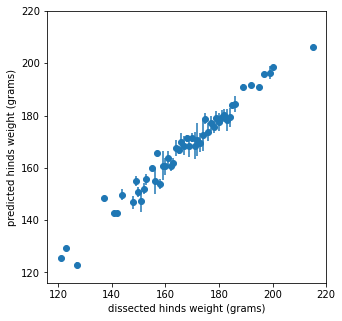

In [29]:
fig= plt.figure(figsize=(5, 5))
ax= fig.add_subplot(111)
tmp= pd.DataFrame({'y_test': np.hstack(y_test), 'y_pred': np.hstack(y_pred)}).groupby('y_test').agg({'y_pred': ['mean', 'std']})['y_pred'].reset_index(drop=False)

ax.scatter(tmp['y_test'], tmp['mean'])
ax.errorbar(tmp['y_test'], tmp['mean'], yerr=tmp['std'], ls='none')
ax.set_xlabel('dissected hinds weight (grams)')
ax.set_ylabel('predicted hinds weight (grams)')
ax.set_xlim(np.min([np.min(y_pred), np.min(y_test)])-5, np.max([np.max(y_pred), np.max(y_test)])+5)
ax.set_ylim(np.min([np.min(y_pred), np.min(y_test)])-5, np.max([np.max(y_pred), np.max(y_test)])+5)
fig.savefig('hinds_plot.pdf')